In [1]:
#2.Data Wrangling and Cleaning

from google.colab import files
uploaded=files.upload()

import pandas as pd

# Load the dataset
nba_data = pd.read_csv("NBAPlayerlist.csv")

nba_data

Saving NBAPlayerlist.csv to NBAPlayerlist.csv


,Unnamed: 0,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR,POINTS
0,0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,0,76001,HISTADD_alaa_abdelnaby,0,NaN,NaN,NaN,0,NaN,1994,NaN
1,1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,0,76002,HISTADD_zaid_abdul-aziz,0,NaN,NaN,NaN,0,NaN,1977,NaN
2,2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,0,76003,HISTADD_kareem_abdul-jabbar,0,NaN,NaN,NaN,0,NaN,1988,NaN
3,3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,0,51,mahmoud_abdul-rauf,0,NaN,NaN,NaN,0,NaN,2000,NaN
4,4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,0,1505,tariq_abdul-wahad,0,NaN,NaN,NaN,0,NaN,2003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,Kedrick Brown,"Brown, Kedrick",2001,Y,1,2208,kedrick_brown,0,NaN,NaN,NaN,0,NaN,2004,NaN
495,495,Kwame Brown,"Brown, Kwame",2001,Y,0,2198,kwame_brown,0,NaN,NaN,NaN,0,NaN,2012,NaN
496,496,Leon Brown,"Brown, Leon",1946,Y,0,76278,HISTADD_stretch_brown,0,NaN,NaN,NaN,0,NaN,1946,NaN
497,497,Lewis Brown,"Brown, Lewis",1980,Y,0,76279,HISTADD_lewis_brown,0,NaN,NaN,NaN,0,NaN,1980,NaN


In [2]:
# Display basic information about the dataset
print(nba_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 499 non-null    int64  
 1   DISPLAY_FIRST_LAST         499 non-null    object 
 2   DISPLAY_LAST_COMMA_FIRST   499 non-null    object 
 3   FROM_YEAR                  499 non-null    int64  
 4   GAMES_PLAYED_FLAG          499 non-null    object 
 5   OTHERLEAGUE_EXPERIENCE_CH  499 non-null    int64  
 6   PERSON_ID                  499 non-null    int64  
 7   PLAYERCODE                 499 non-null    object 
 8   ROSTERSTATUS               499 non-null    int64  
 9   TEAM_ABBREVIATION          60 non-null     object 
 10  TEAM_CITY                  60 non-null     object 
 11  TEAM_CODE                  60 non-null     object 
 12  TEAM_ID                    499 non-null    int64  
 13  TEAM_NAME                  60 non-null     object 

In [3]:
# Check for missing values
print(nba_data.isnull().sum())


Unnamed: 0                     0
DISPLAY_FIRST_LAST             0
DISPLAY_LAST_COMMA_FIRST       0
FROM_YEAR                      0
GAMES_PLAYED_FLAG              0
OTHERLEAGUE_EXPERIENCE_CH      0
PERSON_ID                      0
PLAYERCODE                     0
ROSTERSTATUS                   0
TEAM_ABBREVIATION            439
TEAM_CITY                    439
TEAM_CODE                    439
TEAM_ID                        0
TEAM_NAME                    439
TO_YEAR                        0
POINTS                       499
dtype: int64


In [4]:
# Handle missing values - example: fill missing values with 0
nba_data.fillna(0, inplace=True)

# Check consistency in team names, abbreviations, and codes
team_info = nba_data[['TEAM_ABBREVIATION', 'TEAM_CITY', 'TEAM_CODE', 'TEAM_ID', 'TEAM_NAME']].drop_duplicates()
print(team_info)

# Data transformation - example: converting FROM_YEAR and TO_YEAR to datetime objects
nba_data['FROM_YEAR'] = pd.to_datetime(nba_data['FROM_YEAR'])
nba_data['TO_YEAR'] = pd.to_datetime(nba_data['TO_YEAR'])

# Reshape data if necessary
# Example: Pivot table to get total games played by each player
player_games_played = nba_data.pivot_table(index='DISPLAY_FIRST_LAST', values='GAMES_PLAYED_FLAG', aggfunc='sum')

# Save cleaned and wrangled data to a new CSV file
nba_data.to_csv("cleaned_nba_data.csv", index=False)

    TEAM_ABBREVIATION      TEAM_CITY     TEAM_CODE     TEAM_ID      TEAM_NAME
0                   0              0             0           0              0
14                SAC     Sacramento         kings  1610612758          Kings
19                MEM        Memphis     grizzlies  1610612763      Grizzlies
21                OKC  Oklahoma City       thunder  1610612760        Thunder
27                NYK       New York        knicks  1610612752         Knicks
32                NOP    New Orleans      pelicans  1610612740       Pelicans
40                LAC             LA      clippers  1610612746       Clippers
41                SAS    San Antonio         spurs  1610612759          Spurs
43                POR       Portland       blazers  1610612757  Trail Blazers
56                IND        Indiana        pacers  1610612754         Pacers
76                WAS     Washington       wizards  1610612764        Wizards
86                DAL         Dallas     mavericks  1610612742  

In [5]:
#3.Descriptive statistics
from google.colab import files
uploaded=files.upload()

import pandas as pd

# Load the NBA dataset
nba_data = pd.read_csv("NBAPlayerlist.csv")


# Select columns of interest
columns_of_interest = ['DISPLAY_FIRST_LAST', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'ROSTERSTATUS']

# Subset the dataset with selected columns
subset_data = nba_data[columns_of_interest]

# Calculate descriptive statistics
descriptive_stats = subset_data.describe()

# Calculate mode for non-numeric variables
mode_stats = subset_data.mode()

# Print descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Print mode
print("\nMode:")
print(mode_stats)

Saving NBAPlayerlist.csv to NBAPlayerlist (1).csv
Descriptive Statistics:
       ROSTERSTATUS
count    499.000000
mean       0.120240
std        0.325569
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

Mode:
  DISPLAY_FIRST_LAST TEAM_ABBREVIATION TEAM_CITY  ROSTERSTATUS
0   Cameron Bairstow               DET   Detroit           0.0
1          Dee Brown               NaN       NaN           NaN


Saving NBAPlayerlist.csv to NBAPlayerlist (2).csv


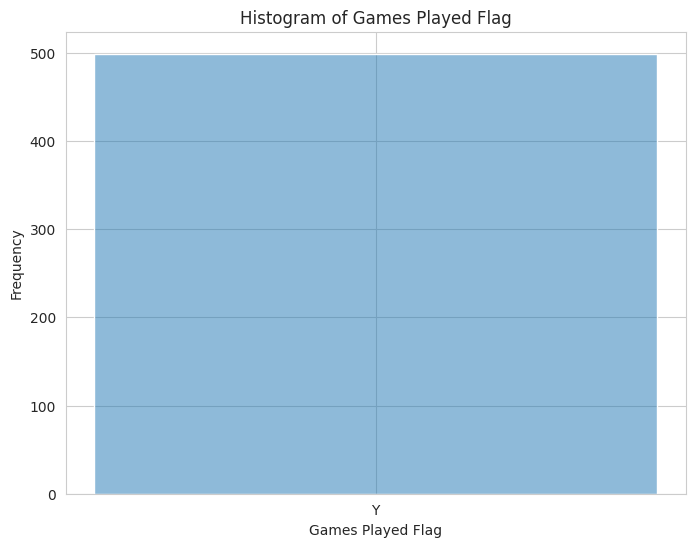

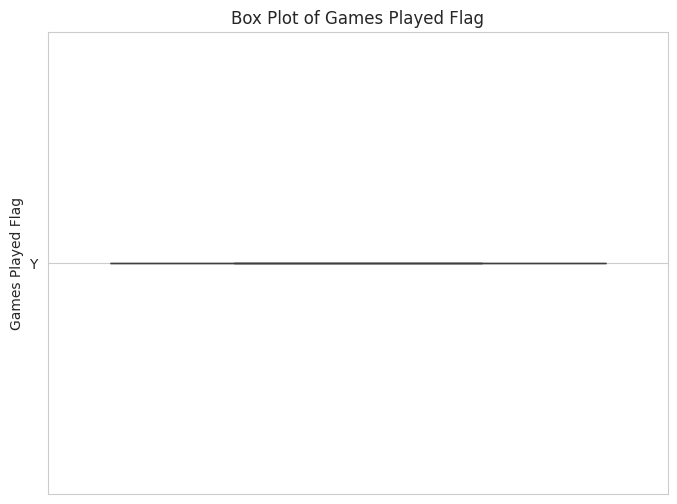

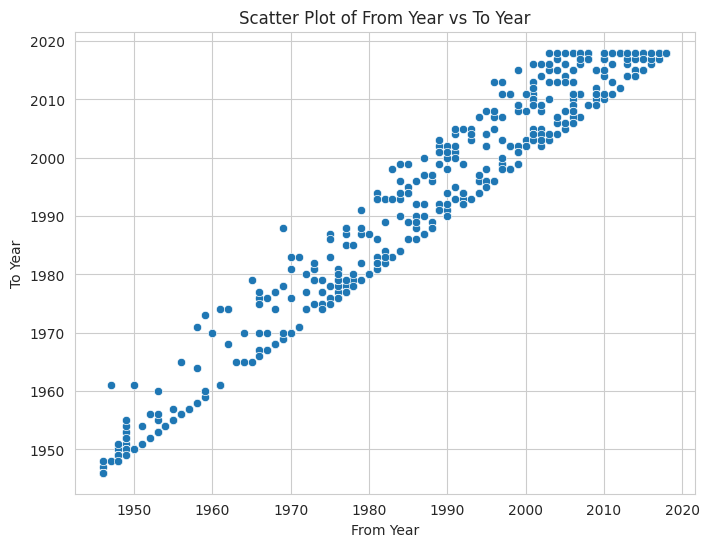

<ipython-input-6-9f562ff595d1>:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = nba_data.corr()


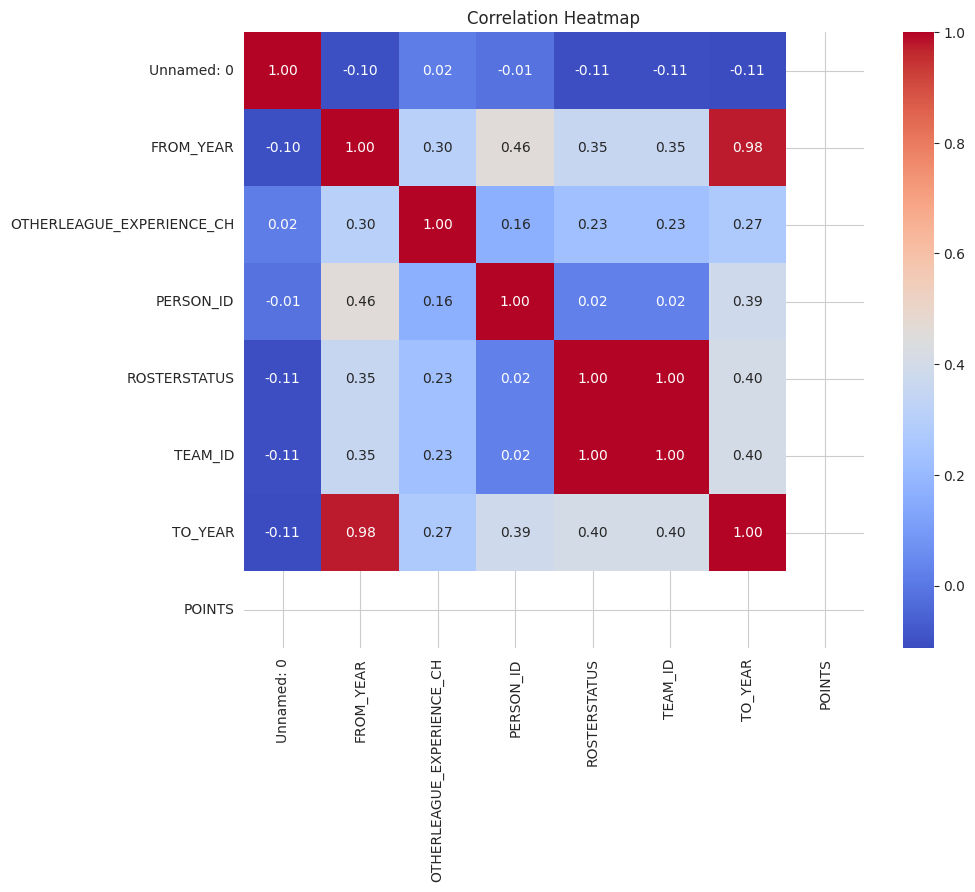

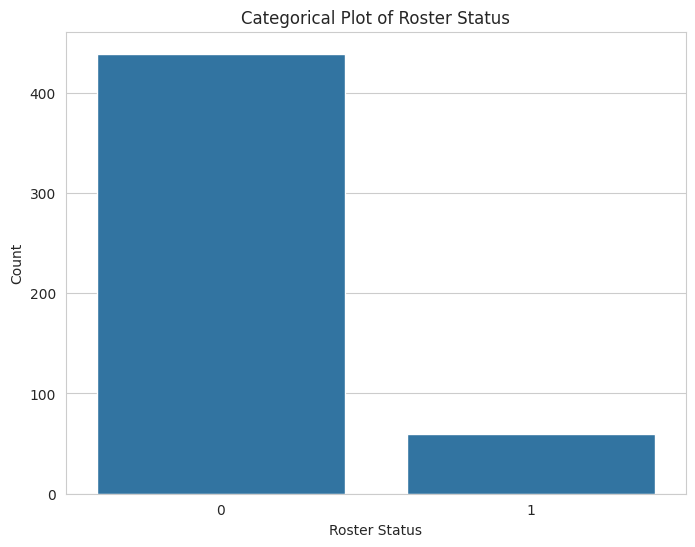

In [6]:
#4.Data Visualisation

from google.colab import files
uploaded=files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NBA dataset
nba_data = pd.read_csv("NBAPlayerlist.csv")

# Set style for seaborn plots
sns.set_style("whitegrid")

# Histogram of games played flag
plt.figure(figsize=(8, 6))
sns.histplot(data=nba_data, x='GAMES_PLAYED_FLAG', bins=10, kde=True)
plt.title('Histogram of Games Played Flag')
plt.xlabel('Games Played Flag')
plt.ylabel('Frequency')
plt.show()

# Box plot of games played flag
plt.figure(figsize=(8, 6))
sns.boxplot(data=nba_data, y='GAMES_PLAYED_FLAG')
plt.title('Box Plot of Games Played Flag')
plt.ylabel('Games Played Flag')
plt.show()

# Scatter plot of from_year vs to_year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_data, x='FROM_YEAR', y='TO_YEAR')
plt.title('Scatter Plot of From Year vs To Year')
plt.xlabel('From Year')
plt.ylabel('To Year')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = nba_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Categorical plot for comparing different groups (example: roster status)
plt.figure(figsize=(8, 6))
sns.countplot(data=nba_data, x='ROSTERSTATUS')
plt.title('Categorical Plot of Roster Status')
plt.xlabel('Roster Status')
plt.ylabel('Count')
plt.show()

Saving NBAPlayerlist.csv to NBAPlayerlist (7).csv


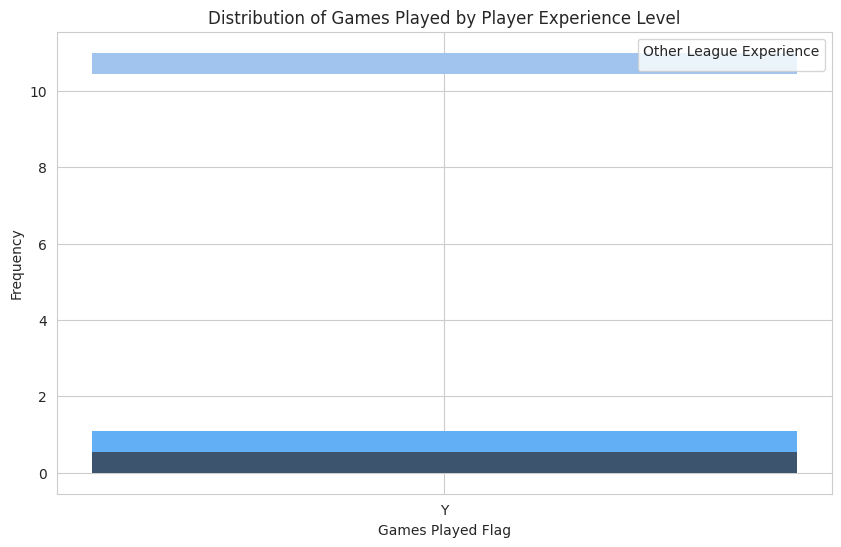

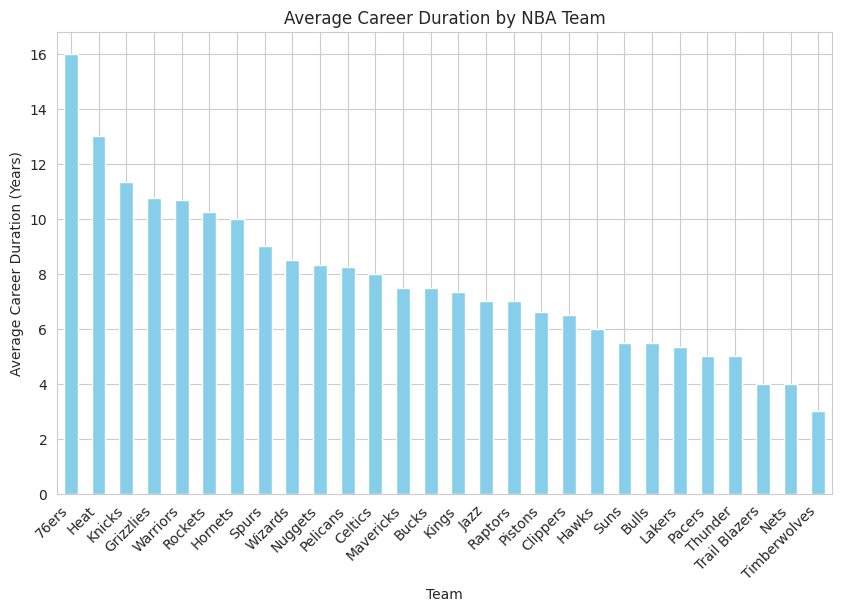

In [11]:
#5.Insightful Analysis

from google.colab import files
uploaded=files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NBA dataset
nba_data = pd.read_csv("NBAPlayerlist.csv")

# Question 1: Distribution of games played by player experience level
plt.figure(figsize=(10, 6))
sns.histplot(data=nba_data, x='GAMES_PLAYED_FLAG', y='OTHERLEAGUE_EXPERIENCE_CH', bins=20, kde=True)
plt.title('Distribution of Games Played by Player Experience Level')
plt.xlabel('Games Played Flag')
plt.ylabel('Frequency')
plt.legend(title='Other League Experience')
plt.show()

# Question 2: Average career duration by NBA team
# Calculate career duration for each player
nba_data['Career_Duration'] = nba_data['TO_YEAR'] - nba_data['FROM_YEAR']

# Calculate average career duration by team
average_tenure_by_team = nba_data.groupby('TEAM_NAME')['Career_Duration'].mean().sort_values(ascending=False)

#plotting
plt.figure(figsize=(10, 6))
average_tenure_by_team.plot(kind='bar', color='skyblue')
plt.title('Average Career Duration by NBA Team')
plt.xlabel('Team')
plt.ylabel('Average Career Duration (Years)')
plt.xticks(rotation=45, ha='right')
plt.show()




Saving NBAPlayerlist.csv to NBAPlayerlist (3).csv
Top 3 contributors/influencers based on 'FROM_YEAR':
        DISPLAY_FIRST_LAST  FROM_YEAR
18            Jaylen Adams       2018
24               Deng Adel       2018
35  DeVaughn Akoon-Purcell       2018

Impact of 'GAMES_PLAYED_FLAG' on the dataset:
Y    499
Name: GAMES_PLAYED_FLAG, dtype: int64

Average start year by team:
TEAM_NAME
Timberwolves     2015.000000
Nets             2014.000000
Thunder          2013.000000
Trail Blazers    2012.500000
Suns             2012.500000
Hawks            2012.000000
Lakers           2011.333333
Pacers           2011.000000
Raptors          2011.000000
Bulls            2010.500000
Bucks            2010.500000
Mavericks        2010.500000
Jazz             2010.000000
Celtics          2010.000000
Pistons          2009.800000
Kings            2009.666667
Clippers         2009.500000
Nuggets          2009.333333
Pelicans         2009.000000
Wizards          2008.500000
Spurs            2008.000000
Hor

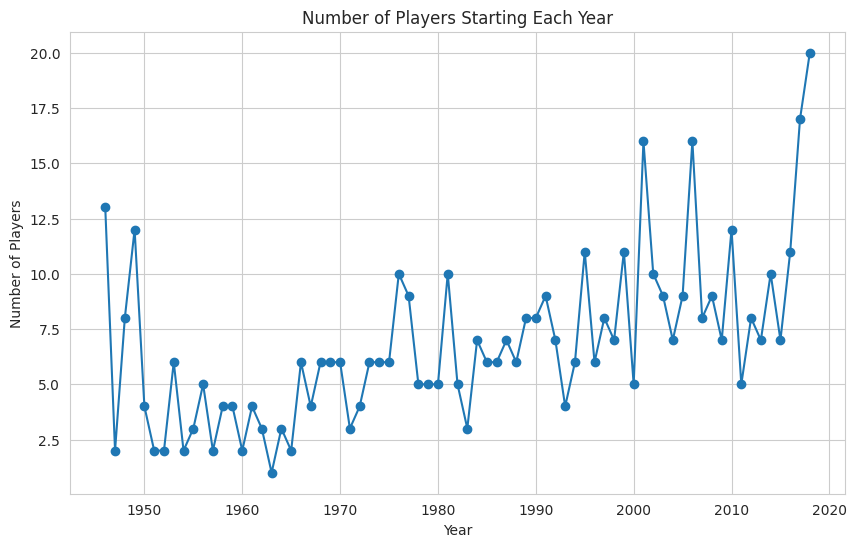

In [7]:
#6.Conditions (Discuss any 4 from your dataset) Examples:
from google.colab import files
uploaded=files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NBA dataset
nba_data = pd.read_csv("NBAPlayerlist.csv")

# 1. Identify the top 3 contributors/influencers in the dataset
top_contributors = nba_data.nlargest(3, 'FROM_YEAR')  # Assuming 'FROM_YEAR' is relevant
print("Top 3 contributors/influencers based on 'FROM_YEAR':")
print(top_contributors[['DISPLAY_FIRST_LAST', 'FROM_YEAR']])

# 2. Explore the impact of a specific variable on the overall dataset
variable_impact = nba_data['GAMES_PLAYED_FLAG'].value_counts()
print("\nImpact of 'GAMES_PLAYED_FLAG' on the dataset:")
print(variable_impact)

# 3. Compare the performance or distribution across different categories
performance_comparison = nba_data.groupby('TEAM_NAME')['FROM_YEAR'].mean().sort_values(ascending=False)
print("\nAverage start year by team:")
print(performance_comparison)

# 4. Visualize changes over time and draw conclusions
# Assuming 'FROM_YEAR' represents the start year
# We'll visualize the number of players starting in each year
import matplotlib.pyplot as plt

yearly_starts = nba_data['FROM_YEAR'].value_counts().sort_index()
yearly_starts.plot(kind='line', marker='o', figsize=(10, 6), title='Number of Players Starting Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

Saving NBAPlayerlist.csv to NBAPlayerlist (6).csv
Top 3 contributors/influencers based on 'FROM_YEAR':
        DISPLAY_FIRST_LAST  FROM_YEAR
18            Jaylen Adams       2018
24               Deng Adel       2018
35  DeVaughn Akoon-Purcell       2018
